## Deep Learning
### Examen Agosto 2022

#### Alumna: Ariadna Garmendia

#### 3) Descargar el dataset desde el siguiente link. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).

#### Entrenar un modelo de deep learning que no utilice embeddings.
#### Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.
#### Compare el score de cada modelo y comente lo necesario.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import torch
from torch.utils.data import Dataset, DataLoader


In [5]:
df = pd.read_csv('dataset_2.csv')
df = pd.DataFrame(df)

Análisis Exploratorio de los datos

In [6]:
df.shape

(550068, 12)

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [9]:
df.User_ID.value_counts(dropna=False)

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [10]:
df.Product_ID.value_counts(dropna=False)

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [11]:
df.Gender.value_counts(dropna=False)

M    414259
F    135809
Name: Gender, dtype: int64

In [12]:
df.Age.value_counts(dropna=False)

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [13]:
df.Occupation.value_counts(dropna=False)

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [14]:
df.City_Category.value_counts(dropna=False)

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [15]:
df.Stay_In_Current_City_Years.value_counts(dropna=False)

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [16]:
df.Marital_Status.value_counts(dropna=False)

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [17]:
df.Product_Category_1.value_counts(dropna=False)

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [18]:
df.Product_Category_2.value_counts(dropna=False)

NaN     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

In [19]:
df.Product_Category_3.value_counts(dropna=False)

NaN     383247
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64

In [20]:
df.Purchase.value_counts(dropna=False)

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

Analizo los Nan

In [21]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Nan values: Hago imputación con la mediana

In [22]:
df.Product_Category_2.fillna(df.Product_Category_2.median(),inplace = True)
df.Product_Category_3.fillna(df.Product_Category_3.median(),inplace = True)

Verifico que no hay mas Nan:

In [23]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Encoding de las variables

In [24]:
# GENDER - BINARY ENCODING
df['Gender_enc'] = df.Gender.apply(lambda label: 0 if label == 'M' else 1)
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_enc
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,14.0,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,14.0,7969,0


In [25]:
age_enc = pd.get_dummies(df["Age"], prefix="Age")
df = pd.concat([df, age_enc], axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_enc,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370,1,1,0,0,0,0,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1,1,0,0,0,0,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,14.0,1422,1,1,0,0,0,0,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057,1,1,0,0,0,0,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,14.0,7969,0,0,0,0,0,0,0,1


In [26]:
# CITY_CATEGORY
citycat_enc = pd.get_dummies(df["City_Category"], prefix="City_Category")
df = pd.concat([df, citycat_enc], axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,...,1,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,1,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,...,1,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,1,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,...,0,0,0,0,0,0,1,0,0,1


In [27]:
#OCCUPATION

occupation_enc = pd.get_dummies(df["Occupation"], prefix="Occupation")
df = pd.concat([df, occupation_enc], axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,...,0,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,0,0,0,0,0,0,0,0,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,...,0,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,0,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
# STAY_IN_CURRENT_CITY_YEARS
stayincity_enc = pd.get_dummies(df["Stay_In_Current_City_Years"], prefix="Stay_In_Current_City_Years")
df = pd.concat([df, stayincity_enc], axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,...,0,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,0,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,...,0,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,0,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,...,1,0,0,0,0,0,0,0,0,1


Esta va a ser mi variable Target:

In [29]:
df["purchase_label"] = df.Purchase.apply(lambda label: 1 if label >= 9000 else 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,purchase_label
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,...,0,0,0,0,0,0,1,0,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,0,0,0,0,0,0,1,0,0,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,...,0,0,0,0,0,0,1,0,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,0,0,0,0,0,0,1,0,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,...,0,0,0,0,0,0,0,0,1,0


1) Entrenamiento sin embeddings - Droppeo las columnas de producto y UserID

In [30]:
X_full = df.drop(columns=['Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 
                            'User_ID', 'Purchase', 'purchase_label', 'Age','Occupation', 'City_Category', 
                            'Gender', 'Stay_In_Current_City_Years'], axis=1)
y_full = df['purchase_label']

In [31]:
X_full.head()

,Marital_Status,Gender_enc,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,...,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [32]:
X_full.columns

Index(['Marital_Status', 'Gender_enc', 'Age_0-17', 'Age_18-25', 'Age_26-35',
       'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Occupation_0', 'Occupation_1',
       'Occupation_2', 'Occupation_3', 'Occupation_4', 'Occupation_5',
       'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9',
       'Occupation_10', 'Occupation_11', 'Occupation_12', 'Occupation_13',
       'Occupation_14', 'Occupation_15', 'Occupation_16', 'Occupation_17',
       'Occupation_18', 'Occupation_19', 'Occupation_20',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+'],
      dtype='object')

In [33]:
X_full.describe()

,Marital_Status,Gender_enc,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,...,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,...,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.409653,0.246895,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093,0.268549,...,0.046123,0.072796,0.012039,0.015382,0.061014,0.135252,0.352358,0.185137,0.173224,0.154028
std,0.491770,0.431205,0.163405,0.385166,0.489734,0.400000,0.276007,0.255136,0.193817,0.443205,...,0.209752,0.259802,0.109058,0.123066,0.239357,0.341993,0.477705,0.388409,0.378441,0.360976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
y_full.head()

0    0
1    1
2    0
3    0
4    0
Name: purchase_label, dtype: int64

Normalizo los datos

In [35]:
X_norm = (X_full - np.min(X_full, axis=0)) / (np.max(X_full, axis=0) - np.min(X_full, axis=0))

In [36]:
X_norm.describe()

,Marital_Status,Gender_enc,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,...,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,...,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.409653,0.246895,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093,0.268549,...,0.046123,0.072796,0.012039,0.015382,0.061014,0.135252,0.352358,0.185137,0.173224,0.154028
std,0.491770,0.431205,0.163405,0.385166,0.489734,0.400000,0.276007,0.255136,0.193817,0.443205,...,0.209752,0.259802,0.109058,0.123066,0.239357,0.341993,0.477705,0.388409,0.378441,0.360976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Separo en Train (80%), test(10%) y validation(10%) 

In [37]:
X_norm = X_norm.to_numpy()
y = y_full.to_numpy()
n = X_norm.shape[0]
print(n)
idx = np.random.permutation(np.arange(0, n))
train_idx = idx[0:int(0.80 * n)]
valid_idx = idx[int(0.80 * n):int(0.90 * n)]
test_idx = idx[int(0.90 * n):]
print(len(train_idx))
print(len(valid_idx))
print(len(test_idx))

550068
440054
55007
55007


In [38]:
#X_train, X_test, y_train, y_test = train_test_split(X_norm, y_full, test_size = 0.2, random_state = 20)

In [39]:
#X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.5, random_state = 20)

In [40]:
#X_train = X_train.to_numpy()
#y_train = y_train.to_numpy().reshape(-1,1)

#X_valid = X_valid.to_numpy()
#y_valid = y_valid.to_numpy().reshape(-1,1)

#X_test = X_test.to_numpy()
#y_test = y_test.to_numpy().reshape(-1,1)


In [41]:
X_train = X_norm[train_idx,:]
y_train = y[train_idx].reshape(-1,1)
X_valid = X_norm[valid_idx,:]
y_valid = y[valid_idx].reshape(-1,1)
X_test = X_norm[test_idx,:]
y_test = y[test_idx].reshape(-1,1)

Valido dimensiones

In [39]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (440054, 38)
y_train shape: (440054, 1)
X_valid shape: (55007, 38)
y_valid shape: (55007, 1)
X_test shape: (55007, 38)
y_test shape: (55007, 1)


Creo la NNet sin Embeddings

In [40]:
class MyDataset(Dataset):

    def __init__(self, X, y): # Recibe todo el dataset
        super().__init__()
        self.X = X
        self.y = y

    def __len__(self):  # Devuelve cantidad de filas que tiene el DS
        return self.X.shape[0]

    def __getitem__(self, idx): # Esto es para poder devolver un item, muestras para iterar. Devolver una tupla con estos dos elementos
        return self.X[idx], self.y[idx]

In [41]:
train = MyDataset(X_train, y_train) # Creo un objeto 

In [42]:
valid = MyDataset(X_valid, y_valid)

In [43]:
test = MyDataset(X_test, y_test)

In [50]:
# El Dataloader (Clase de Pytorch) sirve para generar el batch
train_dataloader = DataLoader(train, batch_size=64, shuffle=True) # Shuffle cambia los datos del batch por cada epoch
valid_dataloader = DataLoader(valid, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test, batch_size=64, shuffle=True)

In [51]:
class NNet(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(in_features=38, out_features=100, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
        self.relu_2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(in_features=100, out_features=50, bias=True)
        self.relu_3 = torch.nn.ReLU()
        self.linear_4 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        self.relu_4 = torch.nn.ReLU()
        self.linear_5 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        self.relu_5 = torch.nn.ReLU()
        #self.linear_6 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        #self.relu_6 = torch.nn.ReLU()
        #self.linear_7 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        #self.relu_7 = torch.nn.ReLU()
        #self.linear_8 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        #self.relu_8 = torch.nn.ReLU()
        #self.linear_9 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        #self.relu_9 = torch.nn.ReLU()
        self.output = torch.nn.Linear(in_features=50, out_features=1, bias=True)

    def forward(self, x): # x.shape -> 64 x 28
        x = self.linear_1(x) # x.shape -> 64 x 100 
        x = self.relu_1(x) # x.shape -> 64 x 100
        x = self.linear_2(x) # x.shape -> 64 x 100
        x = self.relu_2(x) # x.shape -> 64 x 100
        x = self.linear_3(x) # x.shape -> 64 x 100
        x = self.relu_3(x) # x.shape -> 64 x 100
        x = self.linear_4(x) # x.shape -> 64 x 50
        x = self.relu_4(x) # x.shape -> 64 x 50
        x = self.linear_5(x) # x.shape -> 64 x 50
        x = self.relu_5(x) # x.shape -> 64 x 50
        #x = self.linear_6(x) # x.shape -> 64 x 50
        #x = self.relu_6(x) # x.shape -> 64 x 50
        #x = self.linear_7(x) # x.shape -> 64 x 50
        #x = self.relu_7(x) # x.shape -> 64 x 50
        #x = self.linear_8(x) # x.shape -> 64 x 50
        #x = self.relu_8(x) # x.shape -> 64 x 50
        #x = self.linear_9(x) # x.shape -> 64 x 50
        #x = self.relu_9(x) # x.shape -> 64 x 50
        x = self.output(x) # x.shape -> 64 x 1
        return x

Utilizo Adam para el optimizer y Binary Cross Entropy para la loss function

In [52]:
nnet = NNet()
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.001)
loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")


In [60]:
device = ""
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

print(device)

cpu


In [54]:
n_epochs_nnet = 100 

In [55]:
nnet.to(device)

loss_list = []
train_auc = []
loss_valid_list = []
valid_auc = []
for epoch in range(n_epochs_nnet):

    running_loss = 0
    running_y_score = []
    running_y_label = []
    running_valid_loss = 0
    running_y_score_v = []
    running_y_label_v = []

    for i, data in enumerate(train_dataloader):

        # datos del batch
        X_batch, y_batch = data 
        X_batch = X_batch.to(device).float()
        Y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        y_batch_score = nnet(X_batch)
        y_batch_hat = torch.sigmoid(y_batch_score).reshape(-1)

        # backpropagation
        loss = loss_function(y_batch_score, Y_batch) # calcula el loss
        loss.backward() # hacer los gradientes del loss

        # actualización de parametros
        optimizer.step() 

        running_loss += loss.item()
        running_y_score += list(y_batch_score.detach().cpu().numpy()) # Acumula predicción (para graficar lo traemos de GPU a CPU con detach)
        running_y_label += list(Y_batch.detach().cpu().numpy()) # Acumula y_true

    # metrics
    loss_list.append(running_loss)
    fpt, tpr, _ = metrics.roc_curve(running_y_label, running_y_score) # False positive rate and True positive rate, los necesito para calcular AUC
    auc = metrics.auc(fpt, tpr)
    train_auc.append(auc)


    #### VALIDATION ####
    nnet.eval()
    with torch.no_grad(): # Me aseguro de no calcular ningun gradiente, porque estoy haciendo evaluacion
      for i, data in enumerate(valid_dataloader):
        # datos del batch
        X_batch_v, y_batch_v = data 
        X_batch_v = X_batch_v.to(device).float()
        Y_batch_v = y_batch_v.to(device).float()

        # TODO: pasos para acumular y_score and y
        y_batch_score_v = nnet(X_batch_v)
        y_batch_hat_v = torch.sigmoid(y_batch_score_v).reshape(-1)

        valid_loss = loss_function(y_batch_score_v, Y_batch_v) # calcula el loss

        running_valid_loss += valid_loss.item()
        running_y_score_v += list(y_batch_score_v.detach().cpu().numpy())  
        running_y_label_v += list(Y_batch_v.detach().cpu().numpy()) 

     
    # metrics validation
    loss_valid_list.append(running_valid_loss)
    fpt_v, tpr_v, _ = metrics.roc_curve(running_y_label_v, running_y_score_v)
    auc_v = metrics.auc(fpt_v, tpr_v)
    valid_auc.append(auc_v)
    print(f"Epoch {epoch} | Training loss: {running_loss} | Training AUC: {auc}")
    print(f"Epoch {epoch} | Validation loss: {running_valid_loss} | Validation AUC: {auc_v}")



Epoch 0 | Training loss: 293647.6131057739 | Training AUC: 0.558505254949182
Epoch 0 | Validation loss: 36743.44883918762 | Validation AUC: 0.5677447809315049
Epoch 1 | Training loss: 292200.035030365 | Training AUC: 0.5740425792850292
Epoch 1 | Validation loss: 36549.04225349426 | Validation AUC: 0.5797760289914802
Epoch 2 | Training loss: 291274.98083877563 | Training AUC: 0.5829003132591183
Epoch 2 | Validation loss: 36499.48796081543 | Validation AUC: 0.5846057167748989
Epoch 3 | Training loss: 290586.56287384033 | Training AUC: 0.5892183039513654
Epoch 3 | Validation loss: 36440.158155441284 | Validation AUC: 0.5893914099330385
Epoch 4 | Training loss: 289861.6701965332 | Training AUC: 0.594531486396114
Epoch 4 | Validation loss: 36333.286306381226 | Validation AUC: 0.5928819337858329
Epoch 5 | Training loss: 289283.1128959656 | Training AUC: 0.5979362984125185
Epoch 5 | Validation loss: 36385.609703063965 | Validation AUC: 0.593509863071211
Epoch 6 | Training loss: 288932.6638145

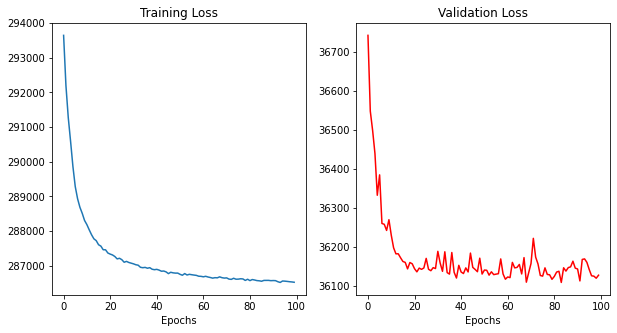

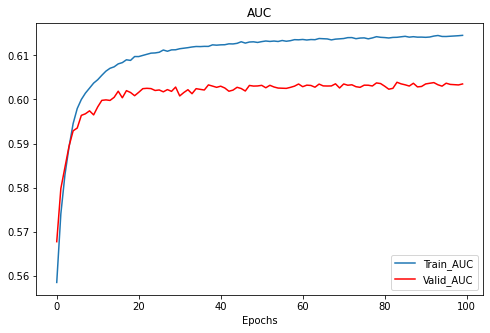

In [56]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
x = range(0, len(loss_list))
plt.plot(x, loss_list)
plt.title('Training Loss')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
x = range(0, len(loss_list))
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.plot(x, loss_valid_list, 'r')

plt.figure(figsize=[8,5])

x = range(0, len(valid_auc))
plt.plot(x, train_auc)
plt.title('AUC')
plt.xlabel('Epochs')
plt.plot(x, valid_auc, 'r')
plt.legend(['Train_AUC', 'Valid_AUC'])

Observación: El modelo esta haciendo underfitting. Probé agregando más neuronas y más capas, aumentando el nro de epochs y cambiando el learning rate, pero nada modifica el resultado. Lo que sospecho es que si el usuario va a gastar más o menos plata, depende fuertemente de features como Product ID, y User UD, que los eliminé para este modelo sin embeddings. Ahora voy a probar con embeddings y eso debería cambiar completamente los resultados.

### NNet con Embeddings

##### Enunciado: Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.
##### Compare el score de cada modelo y comente lo necesario.

Columnas que voy a utilizar con Embedding:
* Product_ID
* User_ID

1) Mapeo a índices

In [42]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,purchase_label
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,...,0,0,0,0,0,0,1,0,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,0,0,0,0,0,0,1,0,0,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,...,0,0,0,0,0,0,1,0,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,0,0,0,0,0,0,1,0,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
product_id = df['Product_ID']
user_id = df['User_ID']


In [44]:
product_id.head()

0    P00069042
1    P00248942
2    P00087842
3    P00085442
4    P00285442
Name: Product_ID, dtype: object

In [45]:
user_id.head()

0    1000001
1    1000001
2    1000001
3    1000001
4    1000002
Name: User_ID, dtype: int64

In [46]:
unique_pid = np.unique(product_id)
index_pid = np.arange(0, len(unique_pid))
product_id_to_index = {key: value for key, value in zip(unique_pid, index_pid)}

In [47]:
unique_uid= np.unique(user_id)
index_uid = np.arange(0, len(unique_uid))
user_id_to_index = {key: value for key, value in zip(unique_uid, index_uid)}

In [48]:
len(product_id_to_index), len(user_id_to_index)

(3631, 5891)

In [49]:
pids_idx = np.array([product_id_to_index[product] for product in product_id])
uids_idx = np.array([user_id_to_index[user] for user in user_id])

Verifico que quedaron bien:

In [50]:
min(pids_idx), max(pids_idx), min(uids_idx), max(uids_idx)

(0, 3630, 0, 5890)

In [51]:
class CustomDatasetWithEmb(Dataset):

    def __init__(self, X, pids_idx, uids_idx, y):
        super().__init__()
        self.X = X
        self.pids_idx = pids_idx
        self.uids_idx = uids_idx
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.pids_idx[idx], self.uids_idx[idx], self.y[idx]

Training, Validation y Testing

In [52]:
pids_index_train = pids_idx[train_idx]
uids_index_train = uids_idx[train_idx]

pids_index_valid = pids_idx[valid_idx]
uids_index_valid = uids_idx[valid_idx]

pids_index_test = pids_idx[test_idx]
uids_index_test = uids_idx[test_idx]

In [53]:

train = CustomDatasetWithEmb(X_train, pids_index_train, uids_index_train, y_train)
valid = CustomDatasetWithEmb(X_valid, pids_index_valid, uids_index_valid, y_valid)

In [54]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
valid_dataloader = DataLoader(valid, batch_size=64, shuffle=True)

In [55]:
class NNetWithEmbeddings(torch.nn.Module):

    def __init__(self, number_of_products, dp, number_of_users, du):
        super().__init__()
        self.embedding_pid = torch.nn.Embedding(num_embeddings=number_of_products, embedding_dim=dp)
        self.embedding_uid = torch.nn.Embedding(num_embeddings=number_of_users, embedding_dim=du)
        self.linear_1 = torch.nn.Linear(in_features=(38+dp+du), out_features=100, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features=100, out_features=100, bias=True)
        self.relu_2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(in_features=100, out_features=50, bias=True)
        self.relu_3 = torch.nn.ReLU()
        self.linear_4 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        self.relu_4 = torch.nn.ReLU()
        self.linear_5 = torch.nn.Linear(in_features=50, out_features=50, bias=True)
        self.relu_5 = torch.nn.ReLU()
        self.output = torch.nn.Linear(in_features=50, out_features=1, bias=True)

    def forward(self, x, pid_idx, uid_idx):
        pid_emb = self.embedding_pid(pid_idx) # (64, d)
        uid_emb = self.embedding_uid(uid_idx) # (64, d)

        final_input = torch.cat([x, pid_emb, uid_emb], dim=1) # (64, 13+d)

        x = self.linear_1(final_input) 
        x = self.relu_1(x)
        x = self.linear_2(x)
        x = self.relu_2(x)
        x = self.linear_3(x) # x.shape -> 64 x 100
        x = self.relu_3(x) # x.shape -> 64 x 100
        x = self.linear_4(x) # x.shape -> 64 x 50
        x = self.relu_4(x) # x.shape -> 64 x 50
        x = self.linear_5(x) # x.shape -> 64 x 50
        x = self.relu_5(x) # x.shape -> 64 x 50       
        x = self.output(x) 
        return x

In [56]:
nnet2 = NNetWithEmbeddings(number_of_products=3631, dp=8, number_of_users=5891, du =8)
optimizer = torch.optim.Adam(nnet2.parameters(), lr=0.001)
loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")

In [57]:
print(nnet2)

NNetWithEmbeddings(
  (embedding_pid): Embedding(3631, 8)
  (embedding_uid): Embedding(5891, 8)
  (linear_1): Linear(in_features=54, out_features=100, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=100, out_features=100, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=100, out_features=50, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=50, out_features=50, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=50, out_features=50, bias=True)
  (relu_5): ReLU()
  (output): Linear(in_features=50, out_features=1, bias=True)
)


In [61]:
n_epochs_nnet2 = 200

In [62]:
nnet = nnet2

nnet.to(device)

loss_list = []
train_auc = []
loss_valid_list = []
valid_auc = []

for epoch in range(n_epochs_nnet2):

    running_loss = 0
    running_y_score = []
    running_y_label = []
    running_valid_loss = 0
    running_y_score_v = []
    running_y_label_v = []


    #### TRAINING ####

    for i, data in enumerate(train_dataloader):

        # datos del batch
        X_batch, pid_idx_batch, uid_idx_batch, y_batch = data 
        X_batch = X_batch.to(device).float()
        pid_idx_batch = pid_idx_batch.to(device)
        uid_idx_batch = uid_idx_batch.to(device)
        Y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        y_batch_score = nnet(X_batch, pid_idx_batch, uid_idx_batch)
        y_batch_hat = torch.sigmoid(y_batch_score).reshape(-1)

        # backpropagation
        loss = loss_function(y_batch_score, Y_batch) # calcula el loss
        loss.backward() # hacer los gradientes del loss

        # actualización de parametros
        optimizer.step() 

        running_loss += loss.item()
        running_y_score += list(y_batch_score.detach().cpu().numpy())  
        running_y_label += list(Y_batch.detach().cpu().numpy()) 

    # metrics training
    loss_list.append(running_loss)
    fpt, tpr, _ = metrics.roc_curve(running_y_label, running_y_score)
    auc = metrics.auc(fpt, tpr)
    train_auc.append(auc)
    #print(f"Epoch {epoch} | Training loss: {running_loss} | AUC: {auc}")

    #### VALIDATION ####
    nnet.eval()
    with torch.no_grad(): # Me aseguro de no calcular ningun gradiente, porque estoy haciendo evaluacion
      for i, data in enumerate(valid_dataloader):
        # datos del batch
        X_batch_v, pid_idx_batch_v, uid_idx_batch_v, y_batch_v = data 
        X_batch_v = X_batch_v.to(device).float()
        pid_idx_batch_v = pid_idx_batch_v.to(device)
        uid_idx_batch_v = uid_idx_batch_v.to(device)
        Y_batch_v = y_batch_v.to(device).float()

        # TODO: pasos para acumular y_score and y
        y_batch_score_v = nnet(X_batch_v, pid_idx_batch_v, uid_idx_batch_v)
        y_batch_hat_v = torch.sigmoid(y_batch_score_v).reshape(-1)

        valid_loss = loss_function(y_batch_score_v, Y_batch_v) # calcula el loss

        running_valid_loss += valid_loss.item()
        running_y_score_v += list(y_batch_score_v.detach().cpu().numpy())  
        running_y_label_v += list(Y_batch_v.detach().cpu().numpy()) 

     
    # metrics validation
    loss_valid_list.append(running_valid_loss)
    fpt_v, tpr_v, _ = metrics.roc_curve(running_y_label_v, running_y_score_v)
    auc_v = metrics.auc(fpt_v, tpr_v)
    valid_auc.append(auc_v)
    print(f"Epoch {epoch} | Training loss: {running_loss} | AUC: {auc}")
    print(f"Epoch {epoch} | Validation loss: {running_valid_loss} | Validation AUC: {auc_v}")





Epoch 0 | Training loss: 173510.22707653046 | AUC: 0.8956292066309857
Epoch 0 | Validation loss: 16495.27544784546 | Validation AUC: 0.9401000008687856
Epoch 1 | Training loss: 125717.08252668381 | AUC: 0.9454470519065468
Epoch 1 | Validation loss: 15535.644131660461 | Validation AUC: 0.9467021013033241
Epoch 2 | Training loss: 118654.80163097382 | AUC: 0.9512316810315095
Epoch 2 | Validation loss: 15023.183418273926 | Validation AUC: 0.9502590577241458
Epoch 3 | Training loss: 114574.71246671677 | AUC: 0.954656968591679
Epoch 3 | Validation loss: 14855.2962808609 | Validation AUC: 0.951855353393236
Epoch 4 | Training loss: 111829.34311628342 | AUC: 0.9569336514343322
Epoch 4 | Validation loss: 14666.353744983673 | Validation AUC: 0.9527393000171763
Epoch 5 | Training loss: 109684.0070271492 | AUC: 0.9586605412543685
Epoch 5 | Validation loss: 14689.127831935883 | Validation AUC: 0.9527553590327557
Epoch 6 | Training loss: 107903.14261198044 | AUC: 0.9600542167018998
Epoch 6 | Validati

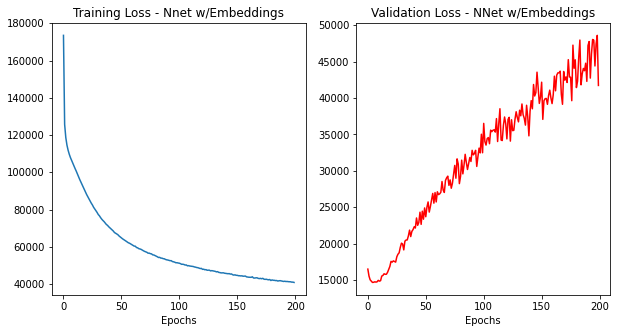

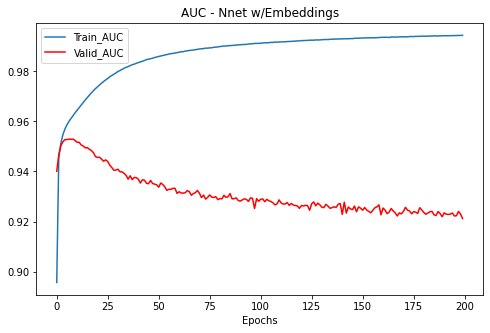

In [63]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
x = range(0, len(loss_list))
plt.plot(x, loss_list)
plt.title('Training Loss - Nnet w/Embeddings')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
x = range(0, len(loss_list))
plt.title('Validation Loss - NNet w/Embeddings')
plt.xlabel('Epochs')
plt.plot(x, loss_valid_list, 'r')

plt.figure(figsize=[8,5])

x = range(0, len(valid_auc))
plt.plot(x, train_auc)
plt.title('AUC - Nnet w/Embeddings')
plt.xlabel('Epochs')
plt.plot(x, valid_auc, 'r')
plt.legend(['Train_AUC', 'Valid_AUC'])